# Sistema de ecuaciones no lineales
---
## Definición de los Puntos de Lagrange

Los **puntos de Lagrange** son posiciones de equilibrio donde un cuerpo de masa despreciable puede mantenerse estacionario respecto a dos cuerpos masivos. Se definen como los puntos donde **el gradiente del potencial efectivo se anula**.

### Condición matemática:
$$
\frac{\partial U}{\partial x} = 0 \quad \text{y} \quad \frac{\partial U}{\partial y} = 0
$$

### Potencial efectivo:
$$
U(x, y) = \frac{1}{2}(x^2 + y^2) + \frac{1-\mu}{r_1} + \frac{\mu}{r_2}
$$

### Donde:
- **Término** $\frac{1}{2}(x^2 + y^2)$: Potencial centrífugo (sistema rotante)
- **Término** $\frac{1-\mu}{r_1}$: Potencial gravitatorio de la Tierra  
- **Término** $\frac{\mu}{r_2}$: Potencial gravitatorio de la Luna

---

## Punto de Lagrange L4 (Triangular)

El **punto L4** que estamos buscando forma un **triángulo equilátero** con la Tierra y la Luna:



El método numérico buscará precisamente esta configuración donde las fuerzas gravitatorias y centrífugas se equilibran exactamente.

---

## Sistema Normalizado

El análisis se realiza en un **sistema de unidades normalizadas** donde:
- La distancia entre la Tierra y la Luna es **1 unidad de distancia**
- Las masas están normalizadas respecto a la masa total del sistema

### Posiciones de los cuerpos:
$$
\text{Tierra: } (-\mu, 0), \qquad \text{Luna: } (1 - \mu, 0)
$$

### Parámetro de masa:
$$
\mu = \frac{m_2}{m_1 + m_2}
$$

### Valores reales de las masas:
- **Masa de la Tierra**: $m_1 = 5.972 \times 10^{24}$ kg
- **Masa de la Luna**: $m_2 = 7.342 \times 10^{22}$ kg
- **Parámetro de masa**: $\mu \approx 0.01215$

Es la razón de masas del sistema Tierra–Luna.

---

## Ecuaciones de equilibrio

Los puntos de equilibrio satisfacen el sistema:

### Sistema de ecuaciones:
$$
\begin{cases}
f_1(x, y) = x - (1-\mu)\dfrac{x+\mu}{r_1^3} - \mu\dfrac{x-(1-\mu)}{r_2^3} = 0 \\[1em]
f_2(x, y) = y - (1-\mu)\dfrac{y}{r_1^3} - \mu\dfrac{y}{r_2^3} = 0
\end{cases}
$$

### Distancias a los cuerpos:
$$
r_1 = \sqrt{(x+\mu)^2 + y^2}, \qquad r_2 = \sqrt{(x-(1-\mu))^2 + y^2}
$$

---

## Método de solución

### 1. Descenso Más Rápido (3 iteraciones)
- **Función objetivo**: $g(x) = \frac{1}{2} \|F(x)\|^2$
- **Gradiente**: $\nabla g(x) = 2J(x)^T F(x)$
- **Actualización**: $x^{(k+1)} = x^{(k)} - \alpha \nabla g(x^{(k)})$

### 2. Newton-Raphson (refinamiento)
- **Sistema lineal**: $J(x^{(k)}) \Delta x^{(k)} = -F(x^{(k)})$
- **Actualización**: $x^{(k+1)} = x^{(k)} + \Delta x^{(k)}$

---




### Definicion del sistema de ecuaciones y calculo del Jacobiano

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

def F(x):
    """
    SISTEMA DE ECUACIONES - PUNTOS DE LAGRANGE
    f1(x,y) = ∂U/∂x = 0
    f2(x,y) = ∂U/∂y = 0
    """
    # Parámetro de masa (Tierra-Luna)
    m1 = 5.972e24  # Masa de la Tierra (kg)
    m2 = 7.342e22  # Masa de la Luna (kg)
    mu = m2 / (m1 + m2)
    
    x_coord = x[0, 0]
    y_coord = x[1, 0]
    
    # Distancias
    r1 = np.sqrt((x_coord + mu)**2 + y_coord**2)        # distancia a la Tierra
    r2 = np.sqrt((x_coord - (1 - mu))**2 + y_coord**2)  # distancia a la Luna
    
    F_val = np.zeros((len(x), 1))
    
    # ∂U/∂x = 0
    F_val[0, 0] = x_coord - (1 - mu)*(x_coord + mu)/(r1**3) - mu*(x_coord - (1 - mu))/(r2**3)
    
    # ∂U/∂y = 0  
    F_val[1, 0] = y_coord - (1 - mu)*y_coord/(r1**3) - mu*y_coord/(r2**3)
    
    return F_val

def jacobian(F, x):
    """
    Jacobiano por diferencias finitas
    """
    h = 1e-8
    n = len(x)
    jac = np.zeros((n, n))
    x_temp = x.copy().astype(float)
    
    for i in range(n):
        original_val = x_temp[i, 0]
        x_temp[i, 0] = original_val - h
        f_izq = F(x_temp)
        x_temp[i, 0] = original_val + h
        f_der = F(x_temp)
        jac[:, i] = (f_der[:, 0] - f_izq[:, 0]) / (2 * h)
        x_temp[i, 0] = original_val
    
    return jac

### 1. Metodo del descenso mas rapido

In [22]:
def g_function(x, F):
    """
    Función g(x) = ½ ||F(x)||²
    """
    Fx = F(x)
    return 0.5 * np.sum(Fx**2)

def grad_g(x, F, J):
    """
    g(x): ∇g(x) = 2J(x)ᵀF(x)
    """
    Fx = F(x)
    return 2 * J.T @ Fx

def busqueda_alpha(h):
    """
    Búsqueda lineal según el método de los apuntes
    h(α) = g(x^(k) - α ∇g(x^(k)))
    """
    # Paso 1: Seleccionar α1 = 0
    alpha1 = 0.0
    g1 = h(alpha1)  # g(x^(k))
    
    # Paso 2: Probar α3 = 1, verificar si h(α3) < h(α1)
    alpha3 = 1.0
    g3 = h(alpha3)
    
    # Si no cumple, reducir α3 hasta que cumpla
    while g3 >= g1 and alpha3 > 1e-10:
        alpha3 *= 0.5
        g3 = h(alpha3)
    
    # Paso 3: α2 = α3/2
    alpha2 = alpha3 / 2.0
    g2 = h(alpha2)
    
    # Calcular parámetros para el polinomio cuadrático
    h1 = (g2 - g1) / (alpha2 - alpha1) if (alpha2 - alpha1) != 0 else 0
    h2 = (g3 - g2) / (alpha3 - alpha2) if (alpha3 - alpha2) != 0 else 0
    h3 = (h2 - h1) / (alpha3 - alpha1) if (alpha3 - alpha1) != 0 else 0
    
    # Calcular α óptimo
    if abs(h3) > 1e-10:  # Evitar división por cero
        alpha_optimo = 0.5 * (alpha2 - h1 / h3)
        # Asegurar que esté en el intervalo [alpha1, alpha3]
        alpha_optimo = max(alpha1, min(alpha3, alpha_optimo))
    else:
        # Si h3 es cero, tomar el mejor de los tres puntos
        alphas = [alpha1, alpha2, alpha3]
        valores = [g1, g2, g3]
        alpha_optimo = alphas[np.argmin(valores)]
    
    return alpha_optimo

def descenso_mas_rapido(F, x0, max_iter=3):
    
    x = x0.copy()
    
    for k in range(max_iter):
        # Calcular ∇g(x^{(k)})
        J = jacobian(F, x)
        Fx = F(x)
        grad_g_val = 2 * J.T @ Fx
        
        # Definir h(α) = g(x^{(k)} - α ∇g(x^{(k)}))
        def h(alpha):
            x_nuevo = x - alpha * grad_g_val
            return g_function(x_nuevo, F)
        
        # Buscar α óptimo usando el método de los apuntes
        alpha_optimo = busqueda_alpha(h)
        
        # Actualizar: x^{(k+1)} = x^{(k)} - α ∇g(x^{(k)})
        x_nuevo = x - alpha_optimo * grad_g_val
        
        # Mostrar resultados
        display(Math(rf"\text{{Iteración }} {k+1}:"))
        display(Math(rf"\hat{{\alpha}} = {alpha_optimo:.6f}"))
        display(Math(rf"\mathbf{{x}}^{{({k+1})}} = \begin{{bmatrix}} {x_nuevo[0,0]:.8f} \\ {x_nuevo[1,0]:.8f} \end{{bmatrix}}"))
        
        x = x_nuevo
    
    return x

display(Latex(r"""### Solucion"""))

# Vector inicial
x0 = np.array([[0.4], [0.8]])
display(Math(rf"\text{{Vector inicial: }}\mathbf{{x}}^{{(0)}} = \begin{{bmatrix}} {x0[0,0]} \\ {x0[1,0]} \end{{bmatrix}}"))

x_resultado = descenso_mas_rapido(F, x0)

display(Latex(r"""### Vector Semilla para Newton-Raphson"""))
display(Math(rf"\mathbf{{x}}_{{\text{{semilla}}}} = \begin{{bmatrix}} {x_resultado[0,0]:.8f} \\ {x_resultado[1,0]:.8f} \end{{bmatrix}}"))


<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

### 2. Newton-Raphson

In [23]:
def newton_raphson(F, x0, max_iter=50, tol=1e-14):
    """
    MÉTODO DE NEWTON-RAPHSON 
    """
    x = x0.copy()
    iteraciones_convergencia = 0
    
    for k in range(max_iter):
        Fx = F(x)
        J = jacobian(F, x)
        
        # Resolver J * Δx = -F(x)
        try:
            delta_x = np.linalg.solve(J, -Fx)
            x = x + delta_x
            
            # Calcular diferencia después de actualizar
            diferencia = np.linalg.norm(delta_x)
            
            if diferencia < tol:
                iteraciones_convergencia = k + 1
                # Mostrar solo la última iteración convergente
                display(Math(rf"\text{{Iteración }} {k+1:2d}:"))
                display(Math(rf"\mathbf{{x}}^{{({k+1})}} = \begin{{bmatrix}} {x[0,0]:12.8f} \\ {x[1,0]:12.8f} \end{{bmatrix}}"))
                display(Math(rf"\|\Delta \mathbf{{x}}^{{({k})}}\| = {diferencia:.2e}"))
                display(Latex(f"Convergencia en {iteraciones_convergencia} iteraciones"))
                break
                
        except np.linalg.LinAlgError:
            display(Latex(r"Error: Jacobiano singular"))
            break
    else:
        iteraciones_convergencia = max_iter
        # Mostrar solo la última iteración (no convergente)
        display(Math(rf"\text{{Última iteración }} {max_iter:2d}:"))
        display(Math(rf"\mathbf{{x}}^{{({max_iter})}} = \begin{{bmatrix}} {x[0,0]:12.8f} \\ {x[1,0]:12.8f} \end{{bmatrix}}"))
        display(Math(rf"\|\Delta \mathbf{{x}}^{{({max_iter-1})}}\| = {diferencia:.2e}"))
        display(Latex(r"No convergió en el máximo de iteraciones"))
    
    return x, iteraciones_convergencia

display(Latex(r"### Resultados"))
x_solucion, iter_newton = newton_raphson(F, x_resultado)

def calcular_distancias_finales(x_solucion):
    """
    Calcular r1 y r2 usando las coordenadas finales de Newton-Raphson
    """
    m1 = 5.972e24  # Masa de la Tierra (kg)
    m2 = 7.342e22  # Masa de la Luna (kg)
    mu = m2 / (m1 + m2)
    
    x_final = x_solucion[0, 0]
    y_final = x_solucion[1, 0]
    
    # Calcular r1 y r2 (distancias en unidades normalizadas)
    r1 = np.sqrt((x_final + mu)**2 + y_final**2)
    r2 = np.sqrt((x_final - (1 - mu))**2 + y_final**2)
    
    # Convertir a distancias reales (km)
    distancia_tierra_luna_km = 384400  # km
    r1_km = r1 * distancia_tierra_luna_km
    r2_km = r2 * distancia_tierra_luna_km
    
    return r1, r2, r1_km, r2_km

# CALCULAR LAS DISTANCIAS PRIMERO
r1, r2, r1_km, r2_km = calcular_distancias_finales(x_solucion)

# RESULTADO FINAL
display(Latex(r"### Coordenadas del punto encontrado:"))
display(Latex(f"##### x = {x_solucion[0,0]:.8f}"))
display(Latex(f"##### y = {x_solucion[1,0]:.8f}"))

display(Latex(r"#### Distancias en unidades normalizadas:"))
display(Latex(f"##### r1 (distancia a Tierra) = {r1:.8f}"))
display(Latex(f"##### r2 (distancia a Luna)   = {r2:.8f}"))

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Grafica

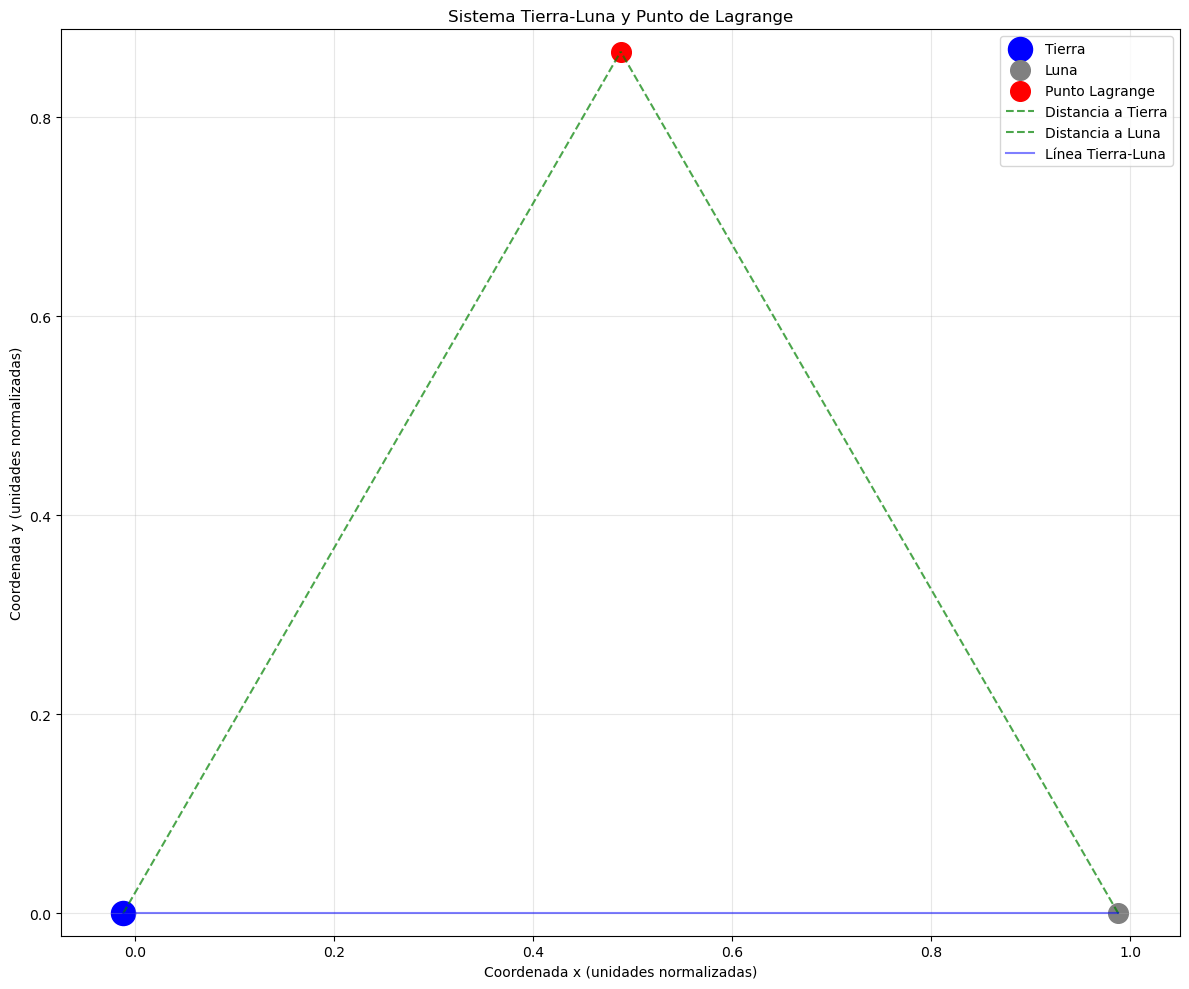

In [24]:
def graficar_sistema(x_solucion):
    """
    Graficar las coordenadas de Tierra, Luna y el punto encontrado
    """
    m1 = 5.972e24
    m2 = 7.342e22
    mu = m2 / (m1 + m2)
    
    # Posiciones
    tierra = [-mu, 0]
    luna = [1 - mu, 0]
    punto = [x_solucion[0, 0], x_solucion[1, 0]]
    
    # Crear figura
    plt.figure(figsize=(12, 10))
    
    # Graficar puntos
    plt.scatter(tierra[0], tierra[1], color='blue', s=300, label='Tierra', marker='o')
    plt.scatter(luna[0], luna[1], color='gray', s=200, label='Luna', marker='o')
    plt.scatter(punto[0], punto[1], color='red', s=200, label='Punto Lagrange', marker='o')
    
    # Graficar líneas de distancia
    plt.plot([tierra[0], punto[0]], [tierra[1], punto[1]], 'g--', alpha=0.7, label='Distancia a Tierra')
    plt.plot([luna[0], punto[0]], [luna[1], punto[1]], 'g--', alpha=0.7, label='Distancia a Luna')
    plt.plot([tierra[0], luna[0]], [tierra[1], luna[1]], 'b-', alpha=0.5, label='Línea Tierra-Luna')
    
    # Configurar gráfica
    plt.xlabel('Coordenada x (unidades normalizadas)')
    plt.ylabel('Coordenada y (unidades normalizadas)')
    plt.title('Sistema Tierra-Luna y Punto de Lagrange')
    plt.grid(True, alpha=0.3)
    plt.axis('equal')
    plt.legend()
    
    # Añadir anotaciones
    #plt.annotate(f'Tierra\n({tierra_pos[0]:.3f}, {tierra_pos[1]:.1f})', 
                #xy=tierra_pos, xytext=(tierra_pos[0]-0.1, tierra_pos[1]+0.1))
    #plt.annotate(f'Luna\n({luna_pos[0]:.3f}, {luna_pos[1]:.1f})', 
                #xy=luna_pos, xytext=(luna_pos[0]+0.05, luna_pos[1]+0.1))
    #plt.annotate(f'Punto Lagrange\n({punto_pos[0]:.6f}, {punto_pos[1]:.6f})', 
                #xy=punto_pos, xytext=(punto_pos[0]+0.05, punto_pos[1]+0.05))
    
    plt.tight_layout()
    plt.show()

graficar_sistema(x_solucion)